In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [3]:
!ls 'drive/My Drive/Hackathon/Hackathon/CreditCardFraud'

credit_test.csv  credit_train.csv


In [0]:
credit_train = pd.read_csv('drive/My Drive/Hackathon/Hackathon/CreditCardFraud/credit_train.csv')
credit_test = pd.read_csv('drive/My Drive/Hackathon/Hackathon/CreditCardFraud/credit_test.csv')

In [5]:
credit_train.shape

(227845, 30)

In [0]:
credit_train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.456417,1.327516,-0.635254,-2.765440,0.282230,-0.758234,0.365270,0.927673,0.033947,-1.138995,-0.715508,-0.254224,-1.846171,1.245659,-0.971792,1.078462,-0.978420,0.279756,-0.152780,-0.273173,-0.268150,-1.027990,-0.123132,-1.147477,0.058896,0.434728,0.067085,0.072365,4.0,'0'
1,-0.879383,1.138867,0.834804,0.904867,0.164135,-0.486903,0.286551,0.437374,-0.751725,-0.293550,-0.381957,0.326399,0.417563,0.601584,1.204848,-0.519876,0.241959,-0.342213,0.028826,0.099614,0.208368,0.597398,-0.073658,0.098907,-0.232732,-0.289270,0.314182,0.120301,11.8,'0'
2,1.270210,-0.755504,1.070372,-0.745716,-1.365979,-0.049645,-1.197854,0.207163,-0.677824,0.731290,1.785716,0.214798,0.189485,-0.214334,0.649570,1.323136,0.156679,-0.875203,0.076711,0.068690,0.475541,1.321484,-0.061854,0.280606,0.297015,-0.050341,0.050163,0.014809,14.0,'0'
3,1.967062,0.445029,-2.472415,1.290097,1.284233,-0.398478,0.641294,-0.209637,-0.219990,-0.224304,0.938790,0.958131,0.411124,-0.957568,-1.072667,0.047732,0.575615,0.567974,-0.012912,-0.107689,0.011025,0.184953,-0.079679,0.188458,0.516061,-0.521453,-0.005402,-0.030380,32.0,'0'
4,-0.626555,1.218109,0.871426,0.950972,-0.311923,-0.711223,0.686529,0.214618,-0.916320,-0.506793,-0.609644,0.231146,0.504067,0.584423,0.930015,-0.210375,-0.049258,0.122546,0.411973,0.034475,0.237543,0.529095,0.015473,0.401008,-0.195985,-0.335558,0.031509,0.106962,64.9,'0'


Combining train and test

In [0]:
credit_train['src'] = 0
credit_test['src'] = 1

In [0]:
src = pd.concat([credit_train,credit_test])

In [8]:
src['Class'].unique()

array(["'0'", "'1'"], dtype=object)

In [0]:
src.loc[src['Class'] == "'0'",'Class'] = 0
src.loc[src['Class'] == "'1'",'Class'] = 1

In [10]:
src[src['Class'] == 1].shape

(492, 31)

In [0]:
src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 56961
Data columns (total 31 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27   

Drop duplicates

In [0]:
src.drop_duplicates(inplace=True)

In [12]:
src.shape

(277706, 31)

In [13]:
src.isin([0]).sum()

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1781
Class     277230
src       221447
dtype: int64

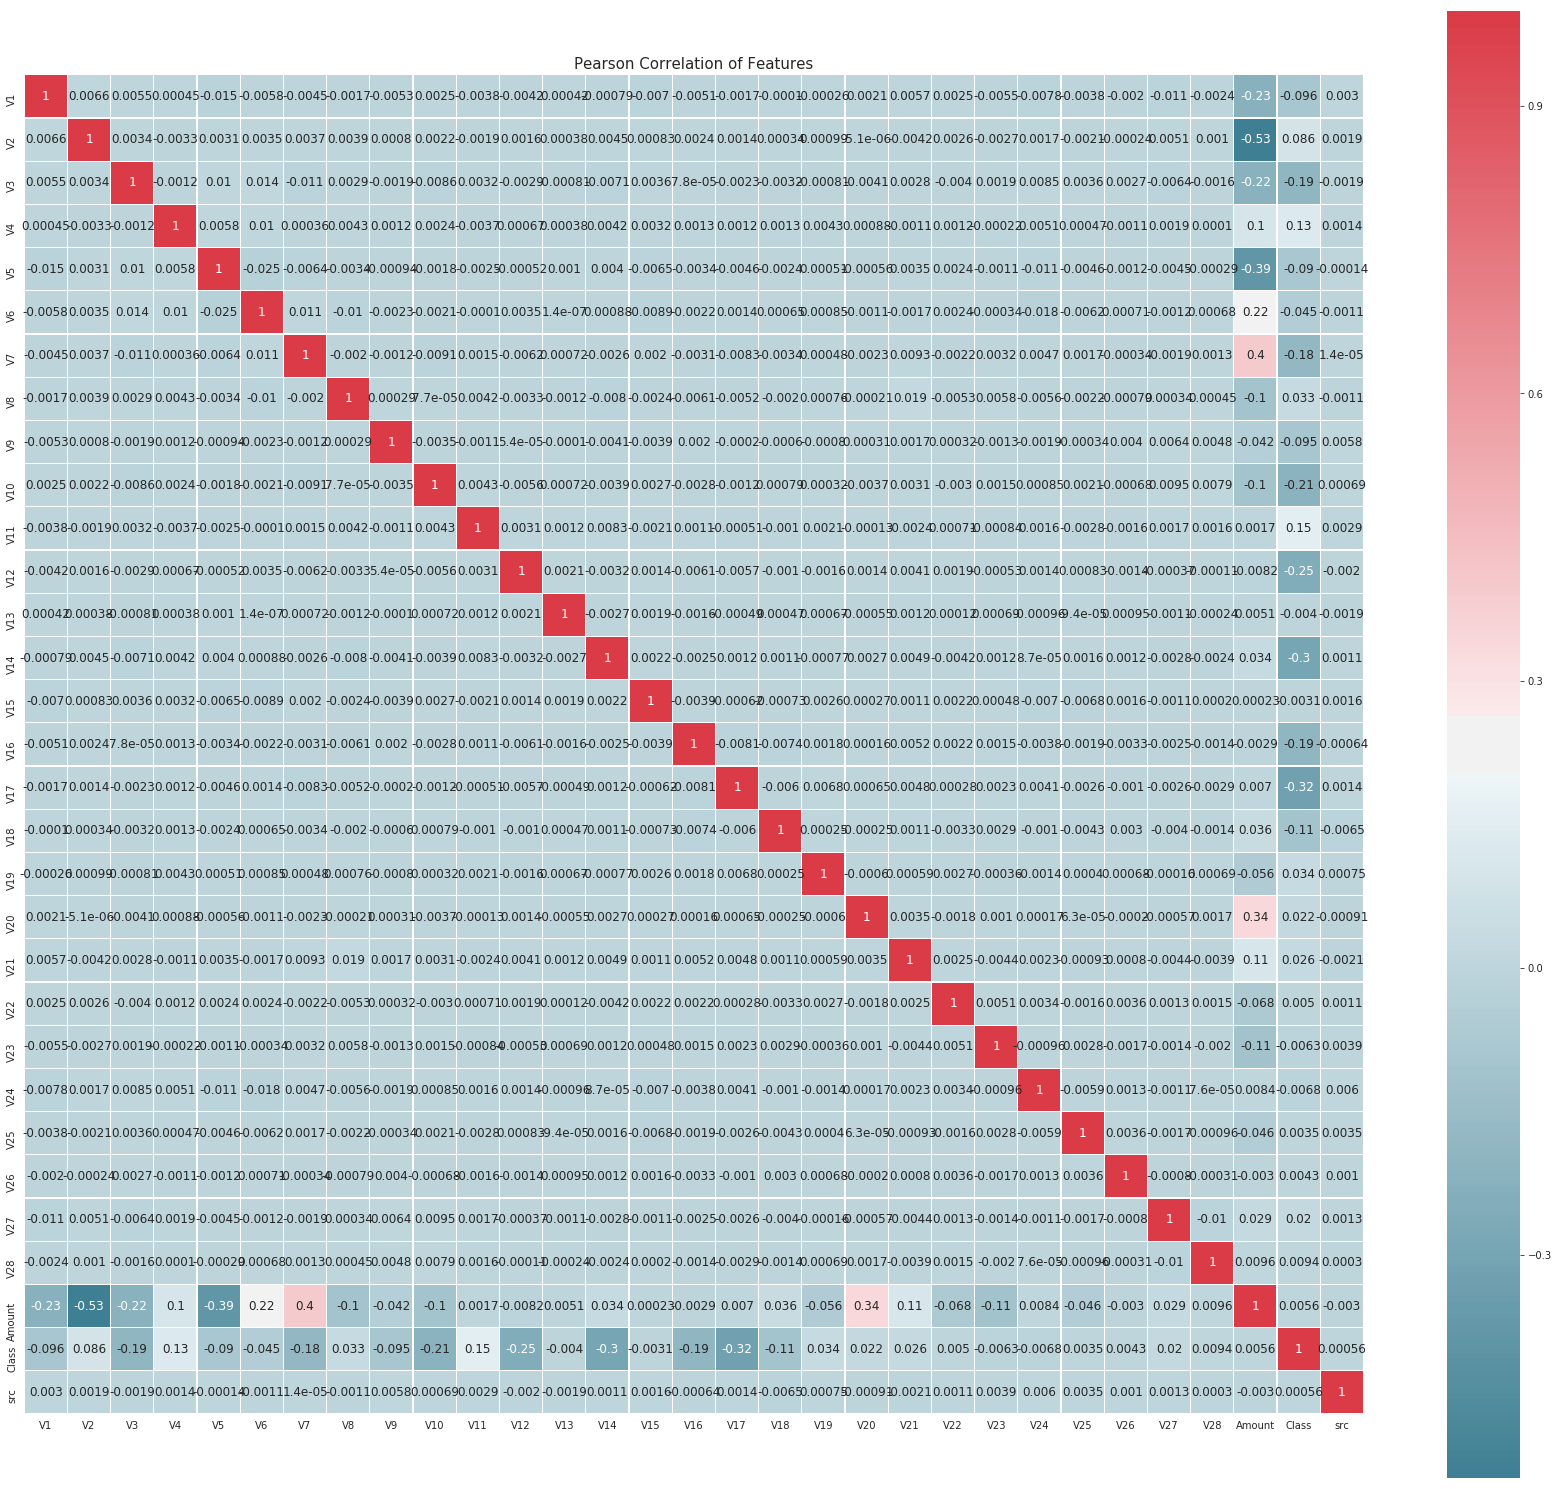

In [14]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
# correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(30, 30))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(src)

In [16]:
src.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,src
count,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000
mean,-0.029554,-0.001489,0.020827,-0.002778,-0.010011,-0.013453,0.006748,-0.004858,-0.009322,0.002300,-0.005724,-0.003688,0.000660,0.000761,-0.008561,-0.003353,0.000460,0.002925,0.000640,0.002659,0.001880,0.004552,-0.001494,-0.005706,-0.003855,-0.000131,0.001475,0.000695,90.082456,0.001714,0.202585
std,1.954360,1.663922,1.508901,1.421973,1.377634,1.315205,1.239696,1.191002,1.100006,1.087573,1.020625,0.998951,0.998963,0.953629,0.917119,0.879244,0.845200,0.840867,0.818943,0.777849,0.732117,0.726076,0.630009,0.605298,0.523483,0.483786,0.401737,0.332077,252.478042,0.041366,0.401926
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000,0.000000
25%,-0.936874,-0.610029,-0.852057,-0.859522,-0.698811,-0.766745,-0.552703,-0.209628,-0.655966,-0.538130,-0.771169,-0.411998,-0.653342,-0.425776,-0.593609,-0.475574,-0.482515,-0.498850,-0.462928,-0.211995,-0.225808,-0.534582,-0.164624,-0.359663,-0.322158,-0.328074,-0.071561,-0.052727,6.140000,0.000000,0.000000
50%,-0.041122,0.069657,0.196684,-0.030019,-0.060230,-0.272534,0.043854,0.022482,-0.061404,-0.092165,-0.038284,0.135329,-0.011646,0.049876,0.038087,0.062734,-0.063837,0.000430,0.001734,-0.059149,-0.026539,0.012011,-0.013071,0.038140,0.011316,-0.055475,0.002302,0.011670,23.280000,0.000000,0.000000
75%,1.297485,0.815974,1.043752,0.751625,0.603954,0.387290,0.580746,0.322079,0.594373,0.467122,0.736324,0.616124,0.667802,0.492325,0.640543,0.524449,0.400852,0.506194,0.464486,0.138287,0.188424,0.532833,0.146111,0.433631,0.347762,0.243540,0.093885,0.080771,79.207500,0.000000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000,1.000000


In [0]:
train = src[src['src'] == 0]
test = src[src['src'] == 1]

In [16]:
print(train.shape)
print(train[train['Class'] == 0].shape)
print(train[train['Class'] == 1].shape)

(221447, 31)
(221070, 31)
(377, 31)


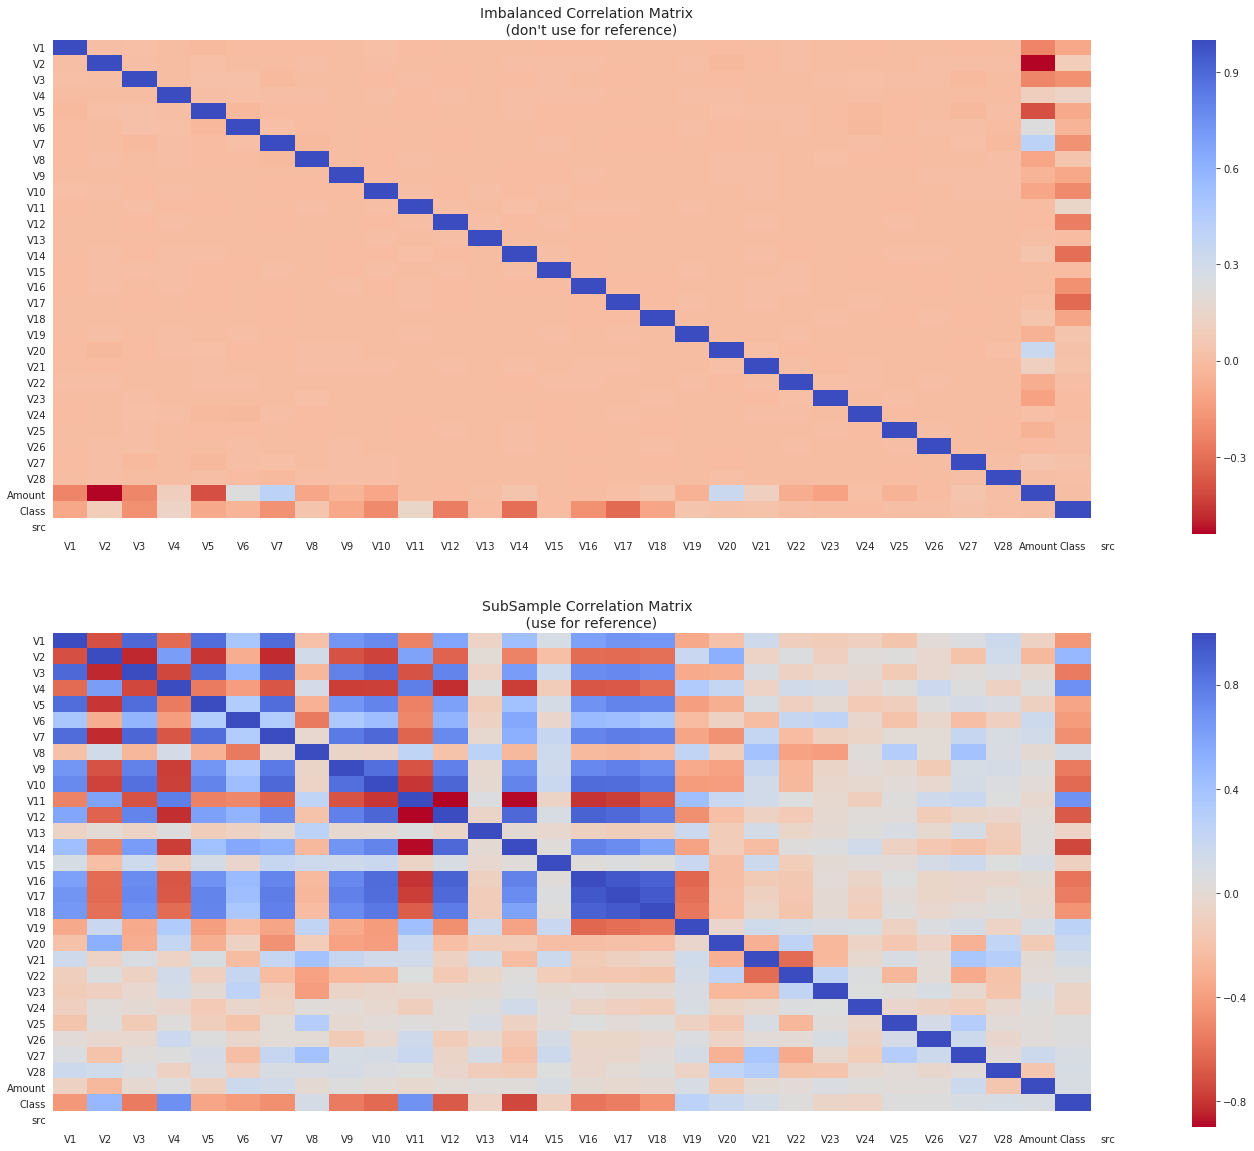

In [18]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

df = train.sample(frac=1)

# amount of fraud classes 377 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:377]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

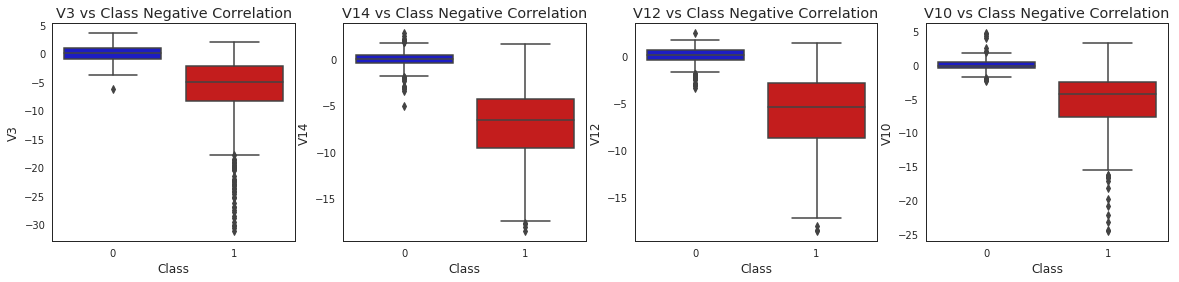

In [22]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = ["#0101DF", "#DF0101"]

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V3", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

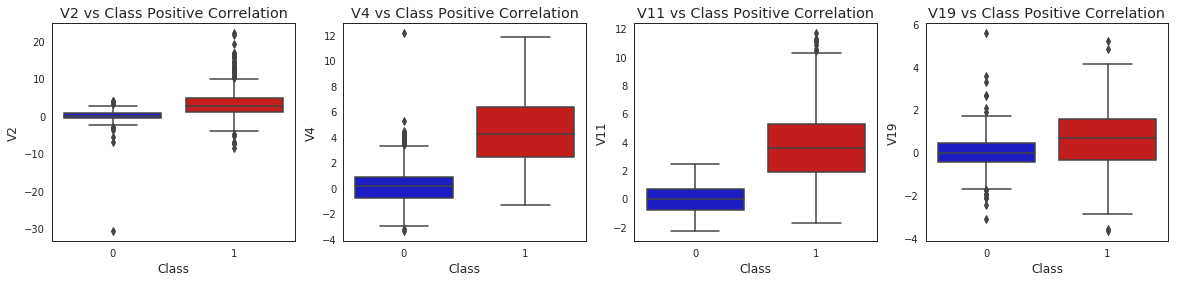

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = ["#0101DF", "#DF0101"]

# Positive Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

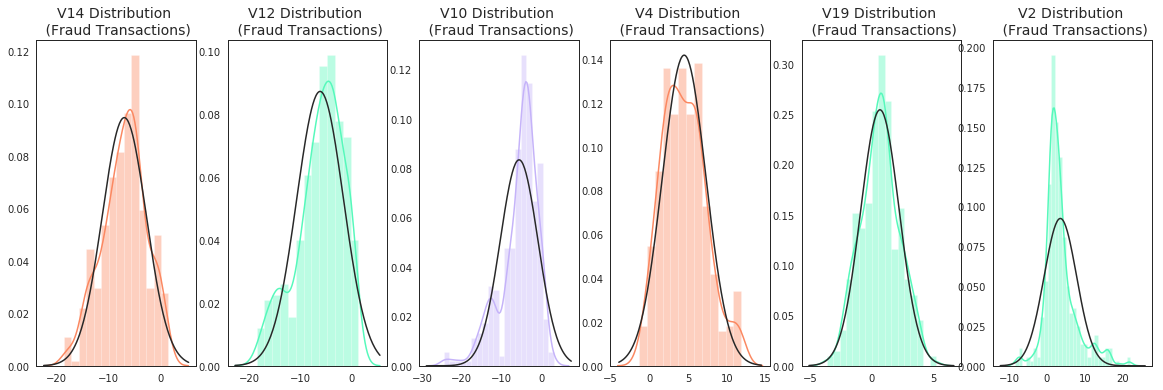

In [35]:
from scipy.stats import norm

f, (ax1, ax2, ax3,ax4,ax5,ax6) = plt.subplots(1,6, figsize=(20, 6))

v14_fraud_dist = train['V14'].loc[train['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = train['V12'].loc[train['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = train['V10'].loc[train['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

v4_fraud_dist = train['V4'].loc[train['Class'] == 1].values
sns.distplot(v4_fraud_dist,ax=ax4, fit=norm, color='#FB8861')
ax4.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)

v19_fraud_dist = train['V19'].loc[train['Class'] == 1].values
sns.distplot(v19_fraud_dist,ax=ax5, fit=norm, color='#56F9BB')
ax5.set_title('V19 Distribution \n (Fraud Transactions)', fontsize=14)

v2_fraud_dist = train['V2'].loc[train['Class'] == 1].values
sns.distplot(v2_fraud_dist,ax=ax6, fit=norm, color='#56F9BB')
ax6.set_title('V2 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

Outlier removal

In [36]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = train['V14'].loc[train['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

train = train.drop(train[(train['V14'] > v14_upper) | (train['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = train['V12'].loc[train['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
train = train.drop(train[(train['V12'] > v12_upper) | (train['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(train)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = train['V10'].loc[train['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
train = train.drop(train[(train['V10'] > v10_upper) | (train['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(train)))

# Removing outliers V19 Feature
v19_fraud = train['V19'].loc[train['Class'] == 1].values
q25, q75 = np.percentile(v19_fraud, 25), np.percentile(v19_fraud, 75)
v19_iqr = q75 - q25

v19_cut_off = v19_iqr * 1.5
v19_lower, v19_upper = q25 - v19_cut_off, q75 + v19_cut_off
print('V19 Lower: {}'.format(v19_lower))
print('V19 Upper: {}'.format(v19_upper))
outliers = [x for x in v19_fraud if x < v19_lower or x > v19_upper]
print('V19 outliers: {}'.format(outliers))
print('Feature V19 Outliers for Fraud Cases: {}'.format(len(outliers)))
train = train.drop(train[(train['V19'] > v19_upper) | (train['V19'] < v19_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(train)))


Quartile 25: -9.57466229922106 | Quartile 75: -4.2672960668817
iqr: 5.30736623233936
Cut Off: 7.96104934850904
V14 Lower: -17.5357116477301
V14 Upper: 3.69375328162734
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.049997689859396, -17.6206343516773, -18.4937733551053, -17.7216383537133]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.213580175920043
V12 Upper: 5.817936472961755
V12 outliers: [-18.4311310279993, -18.047596570821604, -18.553697009645802]
Feature V12 Outliers for Fraud Cases: 3
Number of Instances after outliers removal: 221204
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.931329910073423
V10 Upper: 5.08628382608309
V10 outliers: [-24.403184969972802, -18.2711681738888, -15.3

Test train split

In [0]:
inp_cols = list(train.columns)
inp_cols.remove('Class')
inp_cols.remove('src')
X_train = train[inp_cols]
Y_train = train['Class']
X_test = test[inp_cols]
Y_test = test['Class']

Standard scaling

In [0]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

Results with imbalanced dataset

In [39]:
from xgboost import XGBClassifier
xb = XGBClassifier( )
xb.fit(X_train,Y_train)
Y_pred = xb.predict(X_test)
print('Confusion matrix\n',metrics.confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

Confusion matrix
 [[56150    10]
 [   25    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.88      0.75      0.81        99

    accuracy                           1.00     56259
   macro avg       0.94      0.87      0.90     56259
weighted avg       1.00      1.00      1.00     56259



Introducing sampling to improve performance

Smote sampling

In [40]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, Y_train.ravel()) 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [41]:
trn = pd.DataFrame(y_train_res)
print(trn[trn[0] == 0].shape)
print(trn[trn[0] == 1].shape)

(219667, 1)
(219667, 1)


In [42]:
print(X_train_res.shape)
print(y_train_res.shape)
print(X_test.shape)
print(Y_test.shape)

(439334, 29)
(439334,)
(56259, 29)
(56259,)


In [43]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
xb = XGBClassifier( )
xb.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
Y_pred = xb.predict(X_test)
print('Confusion matrix\n',metrics.confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

Confusion matrix
 [[55539   621]
 [   15    84]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56160
           1       0.12      0.85      0.21        99

    accuracy                           0.99     56259
   macro avg       0.56      0.92      0.60     56259
weighted avg       1.00      0.99      0.99     56259



SMOTETomek

In [103]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='minority')
X_smt, y_smt = smt.fit_sample(X_train, Y_train)
mdl =XGBClassifier()
mdl.fit(X_smt, y_smt)
Y_pred = mdl.predict(X_test)
print(metrics.confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

[[55556   604]
 [   12    87]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56160
           1       0.13      0.88      0.22        99

    accuracy                           0.99     56259
   macro avg       0.56      0.93      0.61     56259
weighted avg       1.00      0.99      0.99     56259



In [0]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process


#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection

#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [

    # #Ensemble Methods
    # ensemble.AdaBoostClassifier(),
    # ensemble.BaggingClassifier(),
    # ensemble.ExtraTreesClassifier(),
    # ensemble.GradientBoostingClassifier(),
    # ensemble.RandomForestClassifier(),

    #Gaussian Processes
    # gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()   
    ]

    #split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = Y_test

#index through MLA and save performance to table
row_index = 0
res = {}
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, Y_train, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    # MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, Y_train)
    Y_pred = alg.predict(X_test)
    res[MLA_name] = Y_pred
    print(MLA_name)
    print(metrics.confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test, Y_pred))
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22

LogisticRegressionCV
[[56145    15]
 [   39    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.80      0.61      0.69        99

    accuracy                           1.00     56259
   macro avg       0.90      0.80      0.84     56259
weighted avg       1.00      1.00      1.00     56259

PassiveAggressiveClassifier
[[56149    11]
 [   62    37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.77      0.37      0.50        99

    accuracy                           1.00     56259
   macro avg       0.88      0.69      0.75     56259
weighted avg       1.00      1.00      1.00     56259

RidgeClassifierCV
[[56148    12]
 [   59    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.77      0.40      0.53        99

    accuracy          

AdaBoostClassifier
[[56136    24]
 [   27    72]]
BaggingClassifier
[[56154     6]
 [   25    74]]
ExtraTreesClassifier
[[56153     7]
 [   24    75]]
GradientBoostingClassifier
[[56137    23]
 [   32    67]]
RandomForestClassifier
[[56153     7]
 [   24    75]]
 LogisticRegressionCV
[[56145    15]
 [   39    60]]
PassiveAggressiveClassifier
[[56112    48]
 [   21    78]]
RidgeClassifierCV
[[56148    12]
 [   59    40]]
SGDClassifier
[[56148    12]
 [   44    55]]
Perceptron
[[56126    34]
 [   22    77]]
BernoulliNB
[[56141    19]
 [   33    66]]
GaussianNB
[[54870  1290]
 [   18    81]]
 KNeighborsClassifier
[[56148    12]
 [   21    78]]
 SVC
[[56154     6]
 [   32    67]]
 DecisionTreeClassifier
[[56128    32]
 [   30    69]]
ExtraTreeClassifier
[[56129    31]
 [   28    71]]
LinearDiscriminantAnalysis
[[56144    16]
 [   23    76]]
QuadraticDiscriminantAnalysis
[[54829  1331]
 [   15    84]]
XGBClassifier
[[56149    11]
 [   23    76]]

AdaBoostClassifier
[[56136    24]
 [   27    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.75      0.73      0.74        99

    accuracy                           1.00     56259
   macro avg       0.87      0.86      0.87     56259
weighted avg       1.00      1.00      1.00     56259

BaggingClassifier
[[56153     7]
 [   26    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.91      0.74      0.82        99

    accuracy                           1.00     56259
   macro avg       0.96      0.87      0.91     56259
weighted avg       1.00      1.00      1.00     56259

ExtraTreesClassifier
[[56151     9]
 [   25    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.89      0.75      0.81        99

    accuracy                           1.00     56259
   macro avg       0.95      0.87      0.91     56259
weighted avg       1.00      1.00      1.00     56259

GradientBoostingClassifier
[[56137    23]
 [   32    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.74      0.68      0.71        99

    accuracy                           1.00     56259
   macro avg       0.87      0.84      0.85     56259
weighted avg       1.00      1.00      1.00     56259

RandomForestClassifier
[[56155     5]
 [   22    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.94      0.78      0.85        99

    accuracy                           1.00     56259
   macro avg       0.97      0.89      0.93     56259
weighted avg       1.00      1.00      1.00     56259

**Best result**
Random forest and XGBoost

FNN

In [48]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Activation, Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [108]:
X_smt.shape

(439334, 29)

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(29, input_shape = (X_smt.shape[1], )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    model.add(Dropout(0.2))  
    model.add(Dense(29))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.1))
    model.add(Dense(29))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2)) 
    model.add(Dense(29))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.1))
    model.add(Dense(2))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.010)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 90, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 95, verbose = 1)

In [0]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [55]:
ensemble_clf.fit(X_smt, y_smt)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
439334/439334 [==============================] - 45s 103us/step - loss: 0.1209 - acc: 0.9557
Epoch 2/100
439334/439334 [==============================] - 44s 100us/step - loss: 0.0656 - acc: 0.9760
Epoch 3/100
439334/439334 [==============================] - 45s 103us/step - loss: 0.0510 - acc: 0.9815
Epoch 4/100
439334/439334 [==============================] - 45s 102us/step - loss: 0.0453 - acc: 0.9839
Epoch 5/100
439334/439334 [==============================] - 44s 100us/step - loss: 0.0397 - acc: 0.9859
Epoch 6/100
439334/439334 [==============================] - 44s 101us/step - loss: 0.0372 - acc: 0.9872
Epoch 7/100
439334/439334 [==============================] - 45s 102us/step - loss: 0.0347 - acc: 0.9880
Epoch 8/100
439334/439334 [=======================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9daeefef98>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9daeefef60>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9daeefefd0>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [62]:
y_pred = ensemble_clf.predict(X_test)

56259/56259 [==============================] - 2s 30us/step


In [63]:
print('Test accuracy:')
print(classification_report(Y_test, y_pred))

Test accuracy:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.30      0.82      0.43        99

    accuracy                           1.00     56259
   macro avg       0.65      0.91      0.72     56259
weighted avg       1.00      1.00      1.00     56259



In [64]:
print(metrics.confusion_matrix(Y_test,y_pred))

[[55967   193]
 [   18    81]]


In [65]:
print(metrics.f1_score(Y_test, y_pred))

0.43431635388739953


In [59]:
y_pred = ensemble_clf.predict(X_train)
print('Train accuracy:')
print(classification_report(Y_train, y_pred))

220014/220014 [==============================] - 7s 30us/step
Train accuracy:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219667
           1       0.37      1.00      0.54       347

    accuracy                           1.00    220014
   macro avg       0.69      1.00      0.77    220014
weighted avg       1.00      1.00      1.00    220014



Using SmoteTomtk sampling

In [133]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100,batch_size=1000, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 90,batch_size=1000, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 95,batch_size=1000, verbose = 1)
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')
ensemble_clf.fit(X_smt, y_smt)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/100
439334/439334 [==============================] - 14s 31us/step - loss: 0.1422 - acc: 0.9528
Epoch 2/100
439334/439334 [==============================] - 7s 15us/step - loss: 0.0649 - acc: 0.9775
Epoch 3/100
439334/439334 [==============================] - 7s 16us/step - loss: 0.0427 - acc: 0.9853
Epoch 4/100
439334/439334 [==============================] - 7s 15us/step - loss: 0.0334 - acc: 0.9887
Epoch 5/100
439334/439334 [==============================] - 7s 15us/step - loss: 0.0275 - acc: 0.9910
Epoch 6/100
439334/439334 [==============================] - 7s 15us/step - loss: 0.0243 - acc: 0.9920
Epoch 7/100
439334/439334 [==============================] - 7s 15us/step - loss: 0.0218 - acc: 0.9929
Epoch 8/100
439334/439334 [==============================] - 7s 15us/step - loss: 0.0192 - acc: 0.9938
Epoch 9/100
439334/439334 [==============================] - 7s 16us/step - loss: 0.0180 - acc: 0.9942
Epoch 10/100
439334/439334 [==============================] - 7s 16us/st

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9d90e1a470>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9d90e1a8d0>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9d90e1aac8>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [134]:
y_pred = ensemble_clf.predict(X_test)
print(metrics.confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test, y_pred))

56259/56259 [==============================] - 3s 51us/step
[[56105    55]
 [   19    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.59      0.81      0.68        99

    accuracy                           1.00     56259
   macro avg       0.80      0.90      0.84     56259
weighted avg       1.00      1.00      1.00     56259



Using SMT but no stacking

In [139]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100,batch_size=500, verbose = 1)
ensemble_clf = VotingClassifier(estimators = [('model1', model1)], voting = 'soft')
ensemble_clf.fit(X_smt, y_smt)
y_pred = ensemble_clf.predict(X_test)
print(metrics.confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/100
439334/439334 [==============================] - 18s 42us/step - loss: 0.0867 - acc: 0.9709
Epoch 2/100
439334/439334 [==============================] - 9s 21us/step - loss: 0.0377 - acc: 0.9872
Epoch 3/100
439334/439334 [==============================] - 9s 21us/step - loss: 0.0329 - acc: 0.9889
Epoch 4/100
439334/439334 [==============================] - 9s 22us/step - loss: 0.0303 - acc: 0.9898
Epoch 5/100
439334/439334 [==============================] - 9s 22us/step - loss: 0.0285 - acc: 0.9905
Epoch 6/100
439334/439334 [==============================] - 10s 22us/step - loss: 0.0279 - acc: 0.9909
Epoch 7/100
439334/439334 [==============================] - 9s 22us/step - loss: 0.0270 - acc: 0.9912
Epoch 8/100
439334/439334 [==============================] - 9s 22us/step - loss: 0.0256 - acc: 0.9916
Epoch 9/100
439334/439334 [==============================] - 10s 22us/step - loss: 0.0250 - acc: 0.9917
Epoch 10/100
439334/439334 [==============================] - 10s 22us